<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

## Demo: How to work with database


Download database file.


In [2]:
!wget -q --show-progress -nv --no-check-certificate https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [3]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*) as number_of_rows
FROM master;
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,number_of_rows
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name AS Table_Name 
FROM sqlite_master 
WHERE type = 'table';
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn).head()


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) AS count
FROM master
GROUP BY age
ORDER BY age;
"""
pd.read_sql_query(QUERY,conn).tail()

,Age,count
51,67.0,1
52,69.0,1
53,71.0,2
54,72.0,1
55,99.0,1


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql 
FROM sqlite_master
WHERE name= '{}';
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


In [8]:
sns.set_theme(style='darkgrid')  # setting plots theme

In [9]:
df = pd.read_sql_query('SELECT * FROM master',conn) # Pulling the data from the database and storing it into a DataFrame

### Histograms


Plot a histogram of `ConvertedComp.`


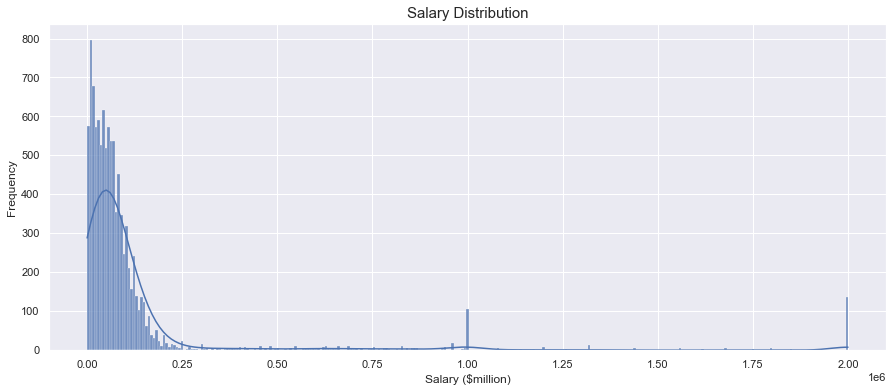

In [10]:
plt.figure(figsize=(15,6))
sns.histplot(df['ConvertedComp'], kde=True, palette='Blues', alpha=0.75);
plt.title('Salary Distribution', fontsize=15)
plt.xlabel('Salary ($million)')
plt.ylabel('Frequency');

### Box Plots


Plot a box plot of `Age.`


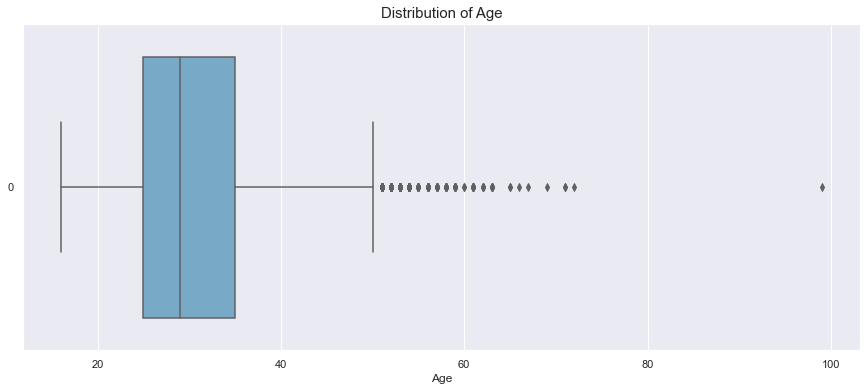

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df['Age'], palette='Blues', orient='h');
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Age');

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


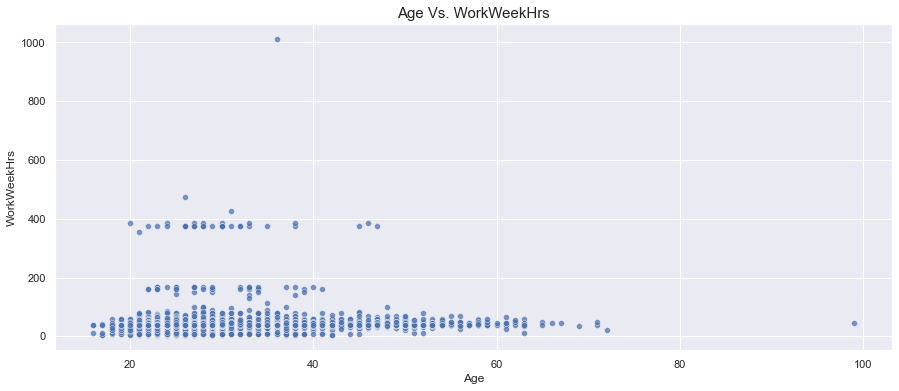

In [12]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='Age', y='WorkWeekHrs', palette='Blues', alpha=0.75)
plt.title('Age Vs. WorkWeekHrs', fontsize=15);

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


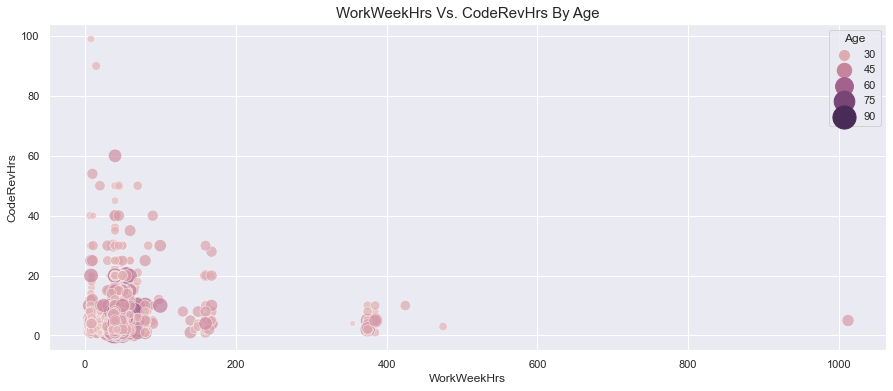

In [13]:
plt.figure(figsize=(15, 6));
sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', alpha=0.7, hue='Age', sizes=(0,600));
plt.title('WorkWeekHrs Vs. CodeRevHrs By Age', fontsize=15);

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


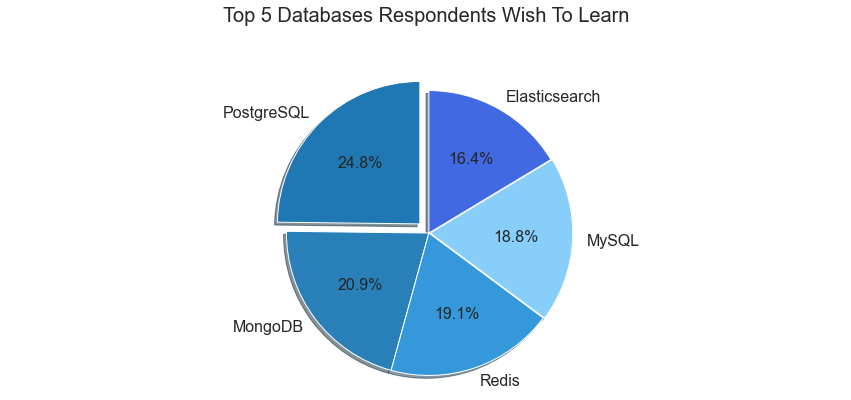

In [14]:
# Quering the Data
query="""
SELECT DatabaseDesireNextYear, COUNT(*) as Count 
FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear 
ORDER BY COUNT(DatabaseDesireNextYear) DESC LIMIT 5;
"""
# Pulling the data from the database and storing it into a DataFrame
df1 = pd.read_sql_query(query,conn)
df1.set_index('DatabaseDesireNextYear', inplace=True)
sns.color_palette("light:b", as_cmap=True)

# Plotting the data
colors =  ['#1f77b4', '#2980b9', '#3498db', '#87cefa', '#4169e1']
df1.Count.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, colors=colors, explode=(.09,0,0,0.01,0),
               figsize=(15,6), fontsize=16)
plt.title('Top 5 Databases Respondents Wish To Learn', y=1.12, fontsize=20)
plt.axis('equal')
plt.ylabel('');

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


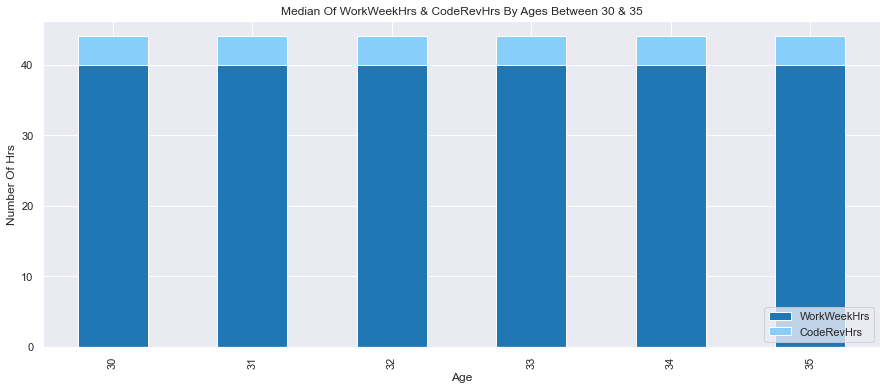

In [15]:
# Quering the data
query = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master 
WHERE Age BETWEEN 30 and 35;
"""

# Pulling the data from the database and storing it into a DataFrame
df2 = pd.read_sql_query(query,conn)

# Grouping by age and getting the median of WorkWeekHrs and CodeRevHrs
ages_30_35 = df2.groupby('Age').median()
ages_30_35.index = ages_30_35.index.astype(int)

# Making the plot
ages_30_35.plot(kind='bar', stacked=True, color = ['#1f77b4', '#87cefa'], figsize=(15,6))
plt.title('Median Of WorkWeekHrs & CodeRevHrs By Ages Between 30 & 35')
plt.ylabel('Number Of Hrs')
plt.legend(loc='lower right');

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


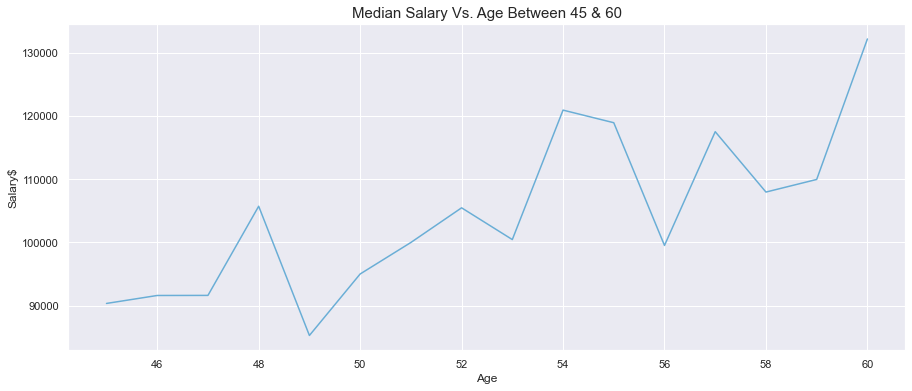

In [16]:
# Quering the data
query = """
SELECT ConvertedComp, Age 
FROM master
WHERE Age BETWEEN 45 and 60;
"""

# Pulling the data from the database and storing it into a DataFrame
df3 = pd.read_sql_query(query,conn)
# Grouping by age and getting the median of WorkWeekHrs and CodeRevHrs
ages_45_60 = df3.groupby('Age').median()

# Plotting The data
plt.figure(figsize=(15,6))
sns.lineplot(data=ages_45_60, palette='Blues')
plt.title('Median Salary Vs. Age Between 45 & 60', fontsize=15)
plt.ylabel('Salary$')
plt.legend().remove()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


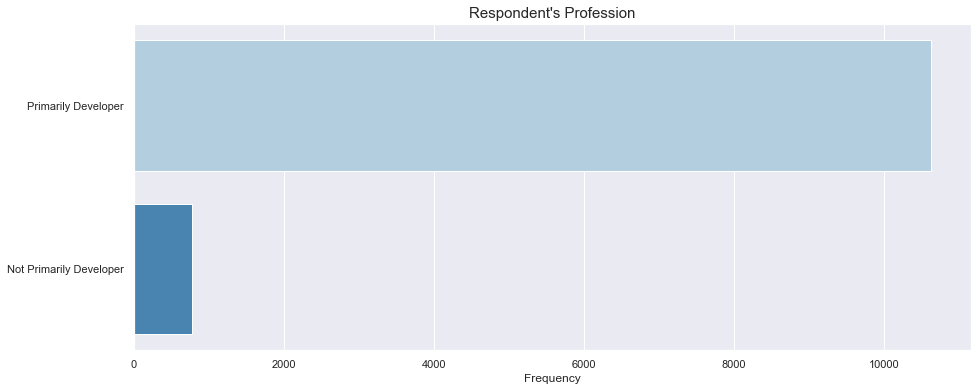

In [17]:
# Getting the  count for each mainbranch type
df_main_branch_count = df['MainBranch'].value_counts().to_frame()

# Changing index names
df_main_branch_count.index = ['Primarily Developer', 'Not Primarily Developer']


# Plotting the data
plt.figure(figsize=(15,6))
sns.barplot(data=df_main_branch_count, x='MainBranch', y=df_main_branch_count.index, palette='Blues')
plt.title("Respondent's Profession", fontsize=15)
plt.xlabel('Frequency');

Close the database connection.


In [18]:
conn.close()  # Closing the database connection

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
